# 2.2 IPython基础

# 1 Running the IPython Shell （运行IPython Shell）

可以通过命令行启动IPython，就像启动标准的Python解释器一样，直接在terminal中键入ipython，回车即可。因为这里我用的是Jupyter Notebook，默认其实就是ipython。所以为了模仿在terminal中打开ipython的场景，前面加了一个！的命令。不过这个命令会让Jupyter Notebook一直处于busy状态，所以没必要真正运行。不过要是运行了的话，可以通过Jupyter中Kernel里的Interrupt来打断。

In [ ]:
!ipython

In [1]:
import numpy as np
from numpy.random import randn

In [4]:
data = {i: randn() for i in range(7)}

data

{0: 0.36862636510023017,
 1: -1.0046655987558732,
 2: -0.279382190013413,
 3: -1.7270937606519925,
 4: -0.6511068649505607,
 5: -0.3520828819011663,
 6: 0.09745356754604081}

因为我们用的是ipython，所以上面输出的字典对象可读性很好，每行一个key对应一个value。但如果是在标准的Python解释器里打印上面的字典的话，可读性就会变差了，比如输出会是
```
{0: -0.6878488995702015, 1: 0.3111764791766575, 2: -0.4951873499757597, 3: 0.1317607911255136, 4: -0.044484140124262925, 5: -1.2855719508755052, 6: -0.2073767192524388}
```
这样的结果很不方便查看。

# 2 Running the Jupyter Notebook（运行Jupyter Notebook）

译者：这个系列的所有笔记都是用Jupyter Notebook来写的，这个工具在数据分析方面真得非常好用，建议大家好好学习一个这个工具。书中用了很多图片来说明，这里我就不进行翻译了，直接推荐一些优秀的教程：

blog：http://codingpy.com/article/getting-started-with-jupyter-notebook-part-1/

如果blog看得不懂的话，推荐墙外的朋友直接上Youtube搜索'Jupyter tutorial'，上面有很多非常棒的视频教程，一步步来总能学会的。如果没法翻墙的话，可以直接在bilibili上搜索'Jupyter notebook'。

# 3 Tab Completion（Tab键自动补全）

只要按下tab键，当前命名空间中任何与已输入的字符串相匹配的变量（对象，函数）就会被找出来：

In [8]:
an_apple = 27
an_example = 42

In [ ]:
an<Tab>

上面的`<Tab>`不是输入，只是一个按键说明。除了定义的an_apple和an_example外，我们会看到还有Python关键字and和内置函数any。

当然，我们也可以在任何对象后面输入一个句点以便自动补全**方法**和**属性**的输入：

In [12]:
b = [1, 2, 3]

In [ ]:
b.<Tab>

还可以用在模块上：

In [9]:
import datetime

In [10]:
datetime.<Tab>

datetime.time

除了命名空间，对象或模块属性。还可以输入任何看上去像是文件路径的东西

In [ ]:
../datasets/<Tab>

In [ ]:
path = '../datasets/<Tab>'

再结合`%run`命令（之后会介绍），该功能可以减少敲击键盘的次数

Tab自动补全还可以用于函数关键字参数（包括等号=）

# 4 Introspection（内省）

在变量的前面或后面加上一个问号`?`，就可以讲有关该对象的一些通用信息显示出来：

In [17]:
b?

这个功能叫做对象内省（object introspection)。如果该对象是一个函数或实例方法，则其docstring也会被显示出来：

In [15]:
def add_number(a, b):
    """
    Add two nummbers together
    
    Return
    ------
    the_sum: type of arguments
    """
    return a + b

In [18]:
add_number?

使用？？还能显示出该函数的源代码：

In [19]:
add_number??

?还有一个用法，即搜索IPython命名空间。一个写字符再配以通配符`*`，即可显示出所有与该通配符表达式相匹配的名称。

例如，我们可以留出Numpy顶级命名空间中含有“load”的所有函数：

In [20]:
np.*load*?

# 5 The %run Command (%run命令）

在IPython会话环境中，所有文件都可以通过%run命令当做Python程序来运行。假设我们在ipython_script_test.py中写了一段简单的脚本，如下：

In [21]:
def f(x, y, z):
    return (x + y) / z

a = 5
b = 6
c = 7.5

result = f(a, b, c)

只要将文件名传给%run就可以运行了：

In [23]:
%run ipython_script_test.py
# 这里假设ipython_script_test.py在当前路径

执行之后，ipython_script_test.py文件中的所有变量也都可以直接访问了

In [24]:
c

7.5

In [26]:
result

1.4666666666666666

如果Python脚本需要用到命令行参数（通过sys.argv访问），可以将参数放到文件路径的后面，就像在命令行上执行那样。

### Interrupting running code （中断正在执行的代码)

任何代码在执行时，只要按下“Ctrl-C”，就会应发一个KeyboardInterrupt。绝大部分情况下，python程序都将立即停止执行。

# 6 Executing Code from the Clipboard （执行剪贴板中的代码)

在IPython中执行代码最简单的方式是粘贴剪贴板中的代码。比如我们希望一段一段地执行脚本，以便查看各个阶段所加载的数据以及产生的结果。

多数情况下，我们能用“Ctrl-Shift-V”讲剪贴板中的代码片段粘贴出来。但这不是万能的。因为这种粘贴方式模拟的是在IPython中逐行输入代码，换行符会被处理成`<return>`，也就是说，如果代码中有所进，且有空行，IPython会认为缩进在空行哪里结束了。当执行到缩进块后面的代码时，会引发一个IndentationError。例如下面这段代码：

In [22]:
x = 5
y = 7
if x > 5:
    x += 1
    
    y = 8

直接粘贴是不行的。（具体的效果大家可以打开terminal，直接试一下。不过这里因为版本的缘故，不会出现书中的错误提示）

![失败的粘贴](https://ws2.sinaimg.cn/large/006tKfTcgy1fkqxqp5hvdj306g05r0ss.jpg)

但我们可以利用%paste和%cpaste这两个魔术函数。%paste可以承载剪贴板中的一切文本，并在shell中以整体形势执行：

![%paste的粘贴](https://ws2.sinaimg.cn/large/006tKfTcgy1fkqxsfhbmvj306s05iglp.jpg)

这里要注意一点，先把复制代码，然后在terminal中输入%paste回车。这个命令会自动执行剪贴板上复制的内容。

%cpaste和%paste差不多，只不过它多出一个用于粘贴代码的特殊提示符而已：

![%cpaste的粘贴](https://ws2.sinaimg.cn/large/006tKfTcgy1fkqxwerc2ej30gm05y3yr.jpg)

建议一直使用%cpaste，因为你可以自己决定是否执行代码，想粘贴多少粘贴多少。

## IPython、编辑器、IDE之间的交互

书中说到了PyDev plugin for Eclipse和Python Tools for Visual Studio，都继承了IPython终端应用程序。这里译者只推荐PyCharm，非常强大且易用的IDE。

# 7 Terminal Keyboard Shortcuts（terminal键盘快捷键）

这里我直接贴出来书中的讲解。因为我的terminal集成了tmux，一些快捷键和IPython有冲突，所以快捷键我并没有怎么用到。

![快捷键](https://ws3.sinaimg.cn/large/006tKfTcgy1fkqy42b68sj30j50hgwil.jpg)

如果对于tmux感兴趣的话，可以看我写的另一个教程，集成了tmux后的terminal会变得更易用：[tmux简洁教程及config关键配置](http://www.jianshu.com/p/fd3bbdba9dc9)


## 异常和跟踪

如果%run某段脚本或执行某条语句时发生了异常，IPython默认会输出整个调用栈跟踪（traceback），其中还会富商调用栈个点附近的几行代码作为上下文参考。

# 7 About Magic Commands（关于魔术命令)

Magic Command，这些命令能提供便利。这些命令是以%为前缀的。例如，可以通过%timeit这个magic command来检测任意python语句的执行时间：

In [23]:
a = np.random.randn(100, 100)

In [24]:
%timeit np.dot(a, a)

The slowest run took 81.37 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 3: 77 µs per loop


magic command可以看做云星宇IPython系统中的命令行程序。他们大都还有一些“命令行萱萱”，使用？查看其选项：

In [25]:
%reset?

魔术命令默认是可以不带百分号使用的，只要没有定义与其同名的变量即可。这个技术叫做automagic,可以通过%automagic打开或关闭

这里列几个比较重要的magic command

![IPython magic command](https://ws2.sinaimg.cn/large/006tKfTcgy1fkr1i9kbcij30jf0na0yr.jpg)

# 8 Matplotlib Integration（Matplotlib整合）

其实上面我们也用到了，通过使用magic command `%matplotlib`能够直接在jupyter中画图。

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt

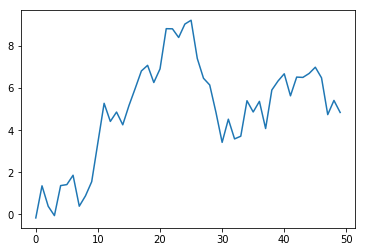

In [31]:
plt.plot(np.random.randn(50).cumsum())